<a href="https://colab.research.google.com/github/Sachinsen1295/house-prices-advanced-regression-techniques/blob/main/Label_Encoding_%26_Ordinal_Encoding%2C_Feature_Scalling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Label Encoding & Ordinal Encoding

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [3]:
df= pd.read_csv(r"/content/drive/MyDrive/Data/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df.shape

(1460, 81)

In [6]:
df2= df[['KitchenQual','BldgType']]

In [7]:
le = LabelEncoder()

In [8]:
le.fit_transform(df2['BldgType'])

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
df2["Building_type"]= le.fit_transform(df2['BldgType'])
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,KitchenQual,BldgType,Building_type
0,Gd,1Fam,0
1,TA,1Fam,0
2,Gd,1Fam,0
3,Gd,1Fam,0
4,Gd,1Fam,0


In [10]:
df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [11]:
df['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [12]:
order_label= {'Ex':1,'Gd':2,'TA':3,'Fa':4}
order_label

{'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4}

In [13]:
df2['kitchenQual_org_enc']=df2['KitchenQual'].map(order_label)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df2.head(20)

,KitchenQual,BldgType,Building_type,kitchenQual_org_enc
0,Gd,1Fam,0,2
1,TA,1Fam,0,3
2,Gd,1Fam,0,2
3,Gd,1Fam,0,2
4,Gd,1Fam,0,2
5,TA,1Fam,0,3
6,Gd,1Fam,0,2
7,TA,1Fam,0,3
8,TA,1Fam,0,3
9,TA,2fmCon,1,3


# **Feature Scalling**

## Standardization & Normalization

1. [what is feature Scaling and Type
](https://docs.google.com/document/d/1F_sVrvZMaWunHX1KKbig8uIZlAsoPG1XJqvcDs1k3yo/edit?usp=sharing)

2. [sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

3. [sklearn.preprocessing.MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [62]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [16]:
df= sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
df2= df[['survived',	'pclass', 'age', 'parch']]
df2.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [19]:
df3= df2.fillna(df2.mean())
df3.isnull().sum()

survived    0
pclass      0
age         0
parch       0
dtype: int64

In [25]:
X= df3.drop("survived", axis=1)
Y= df3["survived"]
print("Shape of X = ", X.shape)
print("Shape of Y = ", Y.shape)

Shape of X =  (891, 3)
Shape of Y =  (891,)


To split Data into train and Test Data sets

In [27]:
from numpy import size
X_train,X_test, Y_train, Y_test =train_test_split(X,Y, test_size= 0.2, random_state=51)

print("Shape of X = ", X_train.shape)
print("Shape of Y = ", Y_train.shape)
print("Shape of X = ", X_test.shape)
print("Shape of Y = ", Y_test.shape)

Shape of X =  (712, 3)
Shape of Y =  (712,)
Shape of X =  (179, 3)
Shape of Y =  (179,)


##Standard Scaler


In [28]:
sc = StandardScaler()

In [30]:
sc.fit(X_train )

StandardScaler()

In [31]:
sc.mean_     #to Check mean

array([ 2.30617978, 29.55409121,  0.39185393])

In [32]:
sc.scale_    # to check standard deviation

array([ 0.84405789, 12.99162985,  0.79647463])

In [33]:
X_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [34]:
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [35]:
X_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [37]:
X_train_sc=pd.DataFrame(X_train_sc , columns = ['pclass',	'age',	'parch'])
X_test_sc = pd.DataFrame(X_test_sc , columns = ['pclass',	'age',	'parch'])

In [39]:
X_train_sc.head()

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [41]:
X_train_sc.describe().round(2)

,pclass,age,parch
count,712.00,712.00,712.00
mean,0.00,0.00,0.00
std,1.00,1.00,1.00
min,-1.55,-2.24,-0.49
25%,-0.66,-0.58,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.19,5.79


##Min Max Scaler

In [42]:
mmc= MinMaxScaler()

In [43]:
mmc.fit(X_train)

MinMaxScaler()

In [44]:
X_train_mmc= mmc.fit(X_train)
X_test_mmc = mmc.fit(X_test)

In [47]:
X_train_mmc = mmc.transform(X_train)
X_test_mmc = mmc.transform(X_test)

In [49]:
X_train_mmc = pd.DataFrame(X_train_mmc , columns = ['pclass',	'age',	'parch'])
X_test_mmc = pd.DataFrame(X_test_mmc , columns = ['pclass',	'age',	'parch'])

In [50]:
X_train_mmc.head()

,pclass,age,parch
0,1.0,0.292661,0.000000
1,1.0,0.690539,0.000000
2,1.0,0.128458,0.000000
3,1.0,0.216875,0.000000
4,1.0,0.364647,0.333333


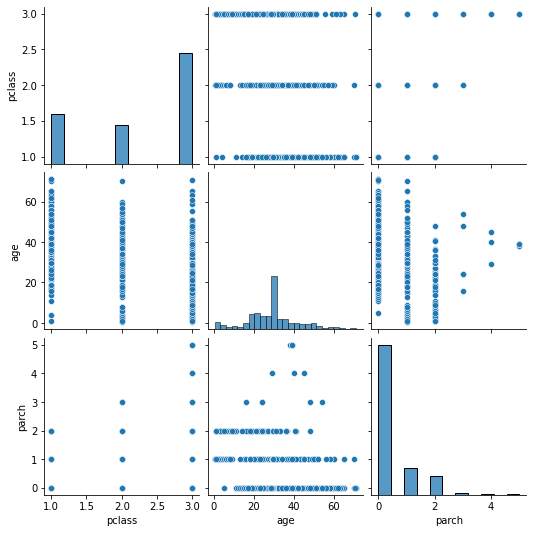

In [51]:
sns.pairplot(X_train)

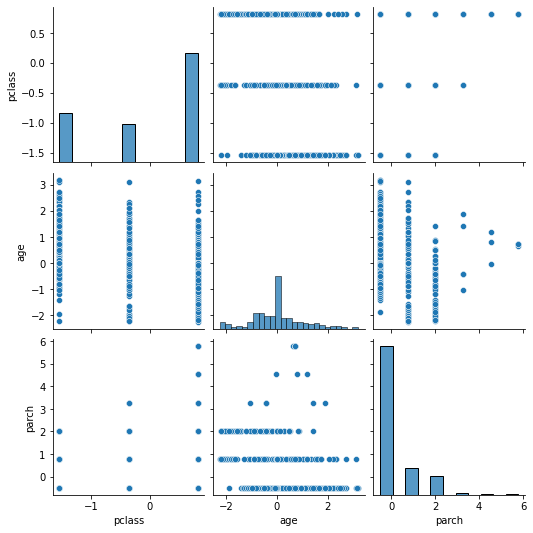

In [53]:
sns.pairplot(X_train_sc)

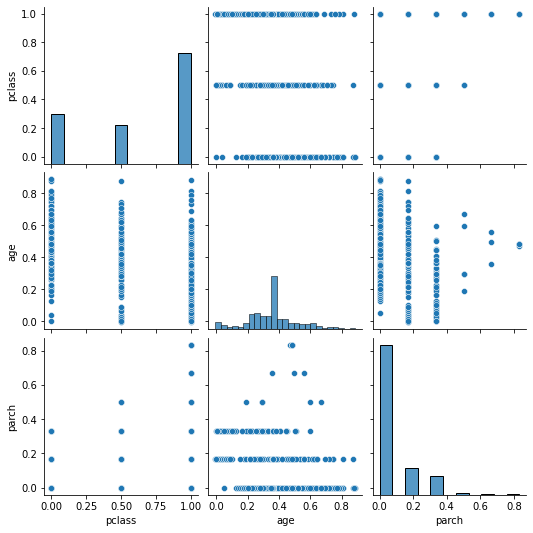

In [67]:
sns.pairplot(X_train_mmc)

# **TRAIN TEST SPLIT**

In [76]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [69]:
df= sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
df2= df[['survived',	'pclass', 'age', 'parch']]
df3= df2.fillna(df2.mean())
df3.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [75]:
X =  df3.drop("survived", axis=1)
Y =df3["survived"]

print(X.shape)
print(Y.shape)

(891, 3)
(891,)


In [81]:
X_train, X_test ,Y_train, Y_test =train_test_split(X,Y, test_size = 0.2, random_state=51)
print("Shape of X = ", X_train.shape)
print("Shape of Y = ", Y_train.shape)
print("Shape of X = ", X_test.shape)
print("Shape of Y = ", Y_test.shape)

Shape of X =  (712, 3)
Shape of Y =  (712,)
Shape of X =  (179, 3)
Shape of Y =  (179,)


In [85]:
X_train.head()

,pclass,age,parch
770,3,24.000000,0
152,3,55.500000,0
731,3,11.000000,0
775,3,18.000000,0
324,3,29.699118,2
